## Overview

In 2017, [Kaggle](https://www.kaggle.com) (a data science community and competition platform) conducted a survey on a large range of users registered as the data scientist in their platform. The survey data are broadly covered the skill set of the data scientists, the demographic of the data scientists, the feedback of the platform and many other information. 

In this task, you will need to 

- **Part 1**: Given the following two data sets, you are required to finish some required analysis, with the exploreation data analytics skills as well as visuilization skills
     - [MCQResponses.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/MCQResponses.csv): Participants' answers to multiple choice questions. Each column contains the answers of one respondent to a specific question.     
     - [ConversionRates.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/ConversionRates.csv): Currency conversion rates to USD. 
- **Part 2**: Given the following data set, you are required to find out top keywords for hiring the data scientists. 
    - [JobPostings.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/JobPostings.csv): Data scientists job advertising in US with job descriptions, from JobPikr.


You will be required to complete the coding to answer the questions with a neat and clean format, and your commenting and adherence to code standards will also be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not necessary to stick to the partial code provided, and you can write your own code to implement the required tasks. But you should provide sufficient comments.


## Part 2 - Data Science Job Advertising Data

In this part, you are required to use the text processing skills to find out the insights in data science job adverising Data.

### 2.1. Load the data and Extract the high frequency words
<a id="text"></a>

Firstly, you will need to load the [JobPostings.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/JobPostings.csv) data and sub-set out of the job description from it.

In [ ]:
import re
import pandas as pd
import nltk
from nltk import pos_tag
from nltk.tokenize import RegexpTokenizer, sent_tokenize
from nltk.probability import *
from itertools import chain
from textblob import TextBlob
import codecs
from nltk.corpus import stopwords 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
df_text = pd.read_csv('JobPostings.csv')

<div class="alert alert-block alert-info">

**Code**: 
You are required to extract the token and append them into the list 'token'.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1.A** In your report's section '2.1.A', including your code of this task. You can copy and paster your completed code in the following cell
</div>


</div>


In [ ]:
# lowercase descriptions
lower = []
for item in df_text['job_description']:
  lower.append(item.lower())           

In [ ]:
# define tokenizer, and extract tokens 
tokens = []
for para in lower:
    tokenizer = RegexpTokenizer(r"(?:[A-Z]{1,3})?[\$£€¥]?(?:\d{1,3},)*\d{1,3}(?:\.\d+)?(?:[%mb])?|(?:[a-zA-Z]\.)+|\w+(?:[-']\w+)?|\w+")
    tokens.append(tokenizer.tokenize(para))

In [ ]:
#take all tokens into one array
allwords = []
for each in tokens:
  for i in each:
    allwords.append(i)

Secondly, 

<div class="alert alert-block alert-info">

**Code**: 
You are required to find out the words freqency which is more than 6000 in the job descriptions. (Please use stopwords at beginning)


<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1.B** In your report's section '2.1.B', list those words with frequency > 6000.
</div>


</div>




In [ ]:
# lemmarize words
lemmatizer = WordNetLemmatizer()
lemmatized_words = []
for w in allwords:
  lemmatized_words.append(lemmatizer.lemmatize(w, pos = 'v'))

In [ ]:
# English frequent stop words
stop_words = set(stopwords.words('english'))

In [ ]:
# remove stopping words
filtered_words = []
for w in lemmatized_words:
    if w not in stop_words:
        filtered_words.append(w)

In [ ]:
# find top common words with document frequencies > 6000
fdist = nltk.FreqDist(filtered_words)
freq6000 = []
for m, n in fdist.items():
  if n > 6000:
    freq6000.append((m,n))

freq6000

[('people', 7571),
 ('work', 43418),
 ('team', 28640),
 ('skills', 19819),
 ('job', 13303),
 ('apply', 13168),
 ('learn', 30177),
 ('knowledge', 13232),
 ('opportunities', 6064),
 ('data', 124672),
 ('scientist', 16364),
 ('science', 26875),
 ('provide', 12536),
 ('statistical', 14657),
 ('analysis', 20628),
 ('model', 33441),
 ('service', 10606),
 ('business', 33571),
 ('solutions', 15122),
 ('design', 11578),
 ('result', 6899),
 ('source', 6999),
 ('etc', 8308),
 ('use', 23005),
 ('quantitative', 6490),
 ('build', 15404),
 ('tool', 13587),
 ('report', 6510),
 ('understand', 11794),
 ('advance', 11982),
 ('include', 15946),
 ('techniques', 11555),
 ('test', 6678),
 ('predictive', 8202),
 ('environment', 8551),
 ('requirements', 8057),
 ('degree', 11345),
 ('field', 8782),
 ('prefer', 8124),
 ('experience', 62611),
 ('analytics', 21846),
 ('role', 7287),
 ('one', 6038),
 ('require', 14059),
 ('r', 9043),
 ('python', 11955),
 ('sql', 8145),
 ('machine', 20779),
 ('methods', 7110),
 ('pr

Then,

<div class="alert alert-block alert-info">

**Code**: 
You are required to sort and display the top 10 high frequency words in 'freq6000'

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1.C** In your report's section '2.1.C', list those top 10 words
</div>


</div>






In [ ]:
# sort top 10 high frequency words in 'freq6000'
sorted_freq6000 = sorted(freq6000, key=lambda freq6000: freq6000[1], reverse=True)
print("Top 10 high frequency words are:")
for each in sorted_freq6000[0:10]:
  print("The frequency of","'", each[0], "'", "is", each[1])

Top 10 high frequency words are:
The frequency of ' data ' is 124672
The frequency of ' experience ' is 62611
The frequency of ' work ' is 43418
The frequency of ' business ' is 33571
The frequency of ' model ' is 33441
The frequency of ' learn ' is 30177
The frequency of ' team ' is 28640
The frequency of ' science ' is 26875
The frequency of ' use ' is 23005
The frequency of ' analytics ' is 21846


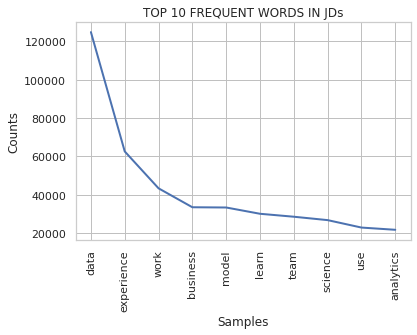

In [ ]:
# display top 10 frequent words
fdist.plot(10, cumulative = False, title = "TOP 10 FREQUENT WORDS IN JDs")
plt.show()

### 2.2. Additonal analytics
<a id="text"></a>
Finally,

<div class="alert alert-block alert-info">

**Code**: 
You are required to carry out one more analytics on this data set, and implement it below.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1.D** In your report's section '2.1.D', describe your self-defined text analysis task, and the discovery from your analysis.
</div>


</div>

Top ten most frequent bigram and trigram pairs in Job Descriptions

In [ ]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
bifinder = BigramCollocationFinder.from_words(filtered_words)
trifinder = TrigramCollocationFinder.from_words(filtered_words)

In [ ]:
bigram = bifinder.ngram_fd.items()
sort = sorted(bigram, key=lambda bigram: bigram[1], reverse=True)
sort[:10]

[(('machine', 'learn'), 19994),
 (('data', 'science'), 16995),
 (('data', 'scientist'), 15922),
 (('years', 'experience'), 7028),
 (('computer', 'science'), 6890),
 (('big', 'data'), 5551),
 (('data', 'set'), 5351),
 (('data', 'analysis'), 5253),
 (('predictive', 'model'), 4364),
 (('data', 'mine'), 4354)]

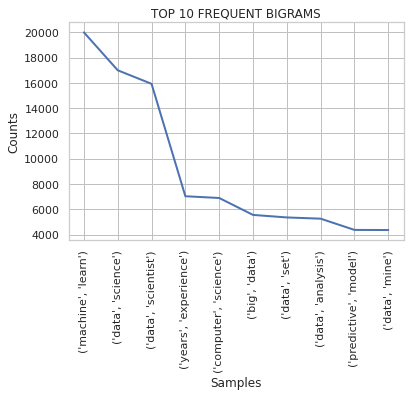

In [ ]:
bifinder.ngram_fd.plot(10, cumulative = False, title = "TOP 10 FREQUENT BIGRAMS")

In [ ]:
trigram = trifinder.ngram_fd.items()
sort = sorted(trigram, key=lambda trigram: trigram[1], reverse=True)
sort[:10]

[(('equal', 'opportunity', 'employer'), 3004),
 (('race', 'color', 'religion'), 2627),
 (('without', 'regard', 'race'), 2418),
 (('sexual', 'orientation', 'gender'), 2252),
 (('regard', 'race', 'color'), 2095),
 (('orientation', 'gender', 'identity'), 2088),
 (('employment', 'without', 'regard'), 1974),
 (('color', 'religion', 'sex'), 1917),
 (('senior', 'data', 'scientist'), 1904),
 (('natural', 'language', 'process'), 1860)]

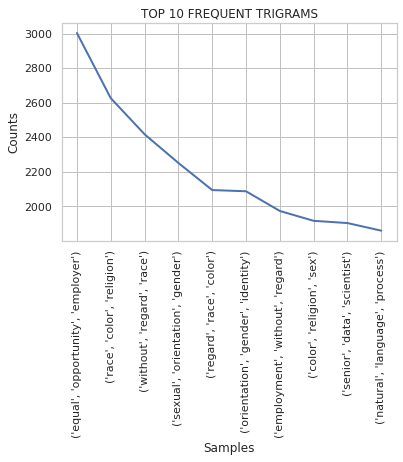

In [ ]:
trifinder.ngram_fd.plot(10, cumulative = False, title = "TOP 10 FREQUENT TRIGRAMS")

Sentiment analysis of Job Descriptions

In [ ]:
jd_sub = []
for i in range(len(lower)):
  jd_sub.append(list(["JD" + str(i+1), TextBlob(lower[i]).sentiment.subjectivity]))
topsubjd = sorted(jd_sub, key = lambda jd_sub:jd_sub[1], reverse = True)
print("Top 10 subjective JDs:")
for i in range(len(topsubjd[0:10])):
  print("The number", str(i+1), "subjective JD is", str(topsubjd[0:10][i][0]), "with subjectivity of", str(topsubjd[0:10][i][1]))

Top 10 subjective JDs:
The number 1 subjective JD is JD4400 with subjectivity of 0.9
The number 2 subjective JD is JD1101 with subjectivity of 0.8150000000000001
The number 3 subjective JD is JD1392 with subjectivity of 0.8125
The number 4 subjective JD is JD4827 with subjectivity of 0.7916666666666666
The number 5 subjective JD is JD353 with subjectivity of 0.7777777777777778
The number 6 subjective JD is JD7917 with subjectivity of 0.775
The number 7 subjective JD is JD9281 with subjectivity of 0.775
The number 8 subjective JD is JD3641 with subjectivity of 0.75625
The number 9 subjective JD is JD1777 with subjectivity of 0.75
The number 10 subjective JD is JD2841 with subjectivity of 0.7448717948717949


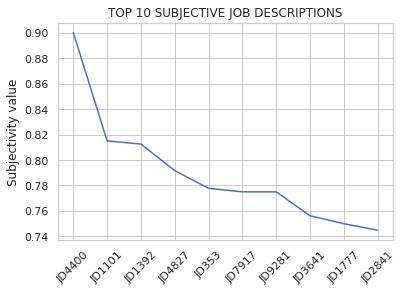

In [ ]:
sub = pd.DataFrame(topsubjd[0:10], columns = ["JD", "Subjectivity"])

plt.plot(sub['JD'], sub['Subjectivity'])
plt.xticks(rotation=45)
plt.ylabel("Subjectivity value")
plt.title("TOP 10 SUBJECTIVE JOB DESCRIPTIONS")
plt.show()

In [ ]:
jd_pol = []
for i in range(len(lower)):
  jd_pol.append(list(["JD" + str(i+1), TextBlob(lower[i]).sentiment.polarity]))
topposjd = sorted(jd_pol, key = lambda jd_pol:jd_pol[1], reverse = True)
print("Top 10 positive JDs:")
for i in range(len(topposjd[0:10])):
  print("The number", str(i+1), "positive JD is", str(topposjd[0:10][i][0]), "with polarity of", str(topposjd[0:10][i][1]))

Top 10 positive JDs:
The number 1 positive JD is JD1777 with polarity of 0.8
The number 2 positive JD is JD356 with polarity of 0.6492857142857144
The number 3 positive JD is JD446 with polarity of 0.6119642857142857
The number 4 positive JD is JD632 with polarity of 0.6119642857142857
The number 5 positive JD is JD8896 with polarity of 0.5464285714285715
The number 6 positive JD is JD353 with polarity of 0.5444444444444444
The number 7 positive JD is JD3641 with polarity of 0.5281250000000001
The number 8 positive JD is JD42 with polarity of 0.5209876543209876
The number 9 positive JD is JD275 with polarity of 0.5208333333333333
The number 10 positive JD is JD2356 with polarity of 0.5005952380952381


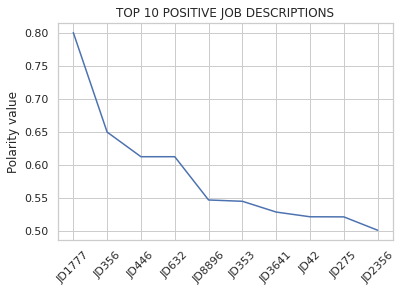

In [ ]:
pol = pd.DataFrame(topposjd[0:10], columns = ['JD', 'Polarity'])

plt.plot(pol["JD"], pol["Polarity"])
plt.xticks(rotation=45)
plt.ylabel("Polarity value")
plt.title("TOP 10 POSITIVE JOB DESCRIPTIONS")
plt.show()